# IE360 Homework1
## 1.Introduction
In this homework, correlation between Housing Loan Interest rate, Housing unit price in Istanbul and House Sales Statistics in Istanbul will be investigated. Investigation will not be detailed. Raw data is started from 2007-10. However, if there is a row with NA that row will be dropped. Since raw data has enough information, this modification will not be high effect on results. Negative correlation between sales and interest rate is expected.


In [279]:
require(readxl) # to read excel input
require(data.table) # to use data.table functionalities
library(xts)
library(ggplot2)
library(reshape2)
data_path = "C:/Users/ataberk/Desktop/veri.xlsx"

Above code is used for preparing the environment and installing related libraries for the homework.

In [156]:
data1=data.table(read_excel(data_path, sheet='Satis'))
data2=data.table(read_excel(data_path, sheet='Faiz'))
data3=data.table(read_excel(data_path, sheet='Birim'))

In this cell, data is read from excel sheet. The data is taken from EVDS.

In [280]:
merged<-cbind(data1,data2$Faiz,data3$Birim)
names(merged)=c("Dates","Sale","Interest","UnitPrice")

All data is merged to a single dataframe using cbind function. It will be easier to analyse data in a single dataframe.

In [ ]:
merged[,Dates:=paste0(merged$Dates,"-","01")]
merged$Dates <- as.Date(merged$Dates)

There is another data type named as "xts". Since time series are investigated, It will be better to use data types that are specialized in time series. Therefore, in above cell required modifications are done in order to change datatable to xts. Xts gets date values in ISO 8601:2004(e) format which is "%Y-%m-%d" or "%Y%m". In this Homework format is chosen as "%Y-%m-%d". Above cell adds dummy %d to each date value in order to use in xts format.

In [286]:
xts1<-as.xts(merged)
xts1<-na.omit(xts1)

In above cell, dataframe is changed to xts object and rows with NA values are dropped. As mentioned in Introduction, this process will not affect our result since data integrity will stay same and there is enough information.

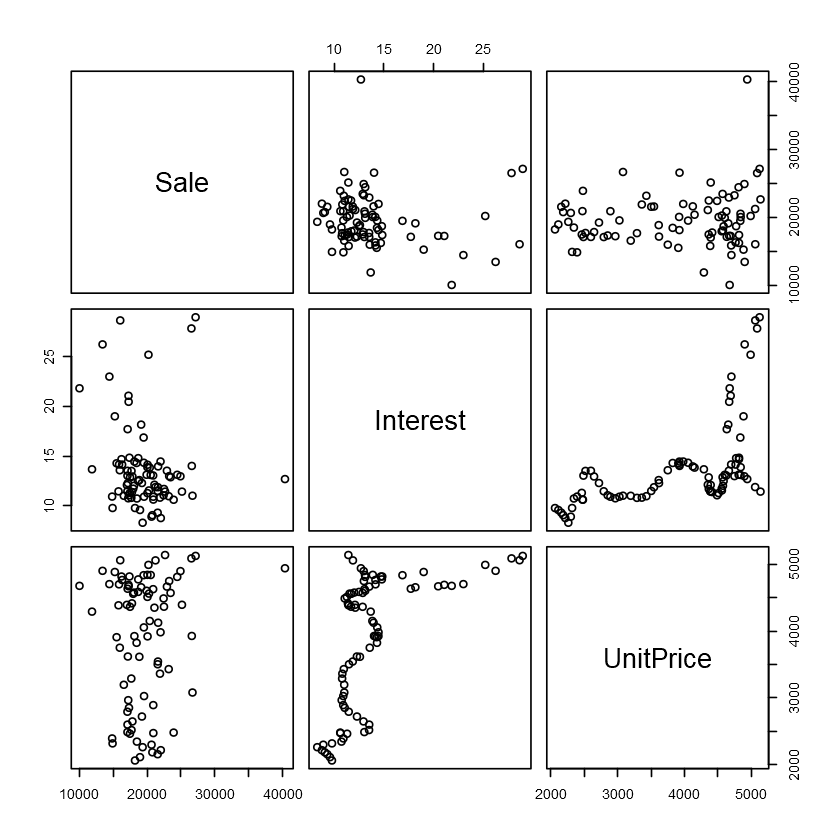

In [289]:
pairs(~Sale+Interest+UnitPrice,data=xts1)

In above cell, one can see pairwise scatterplot.

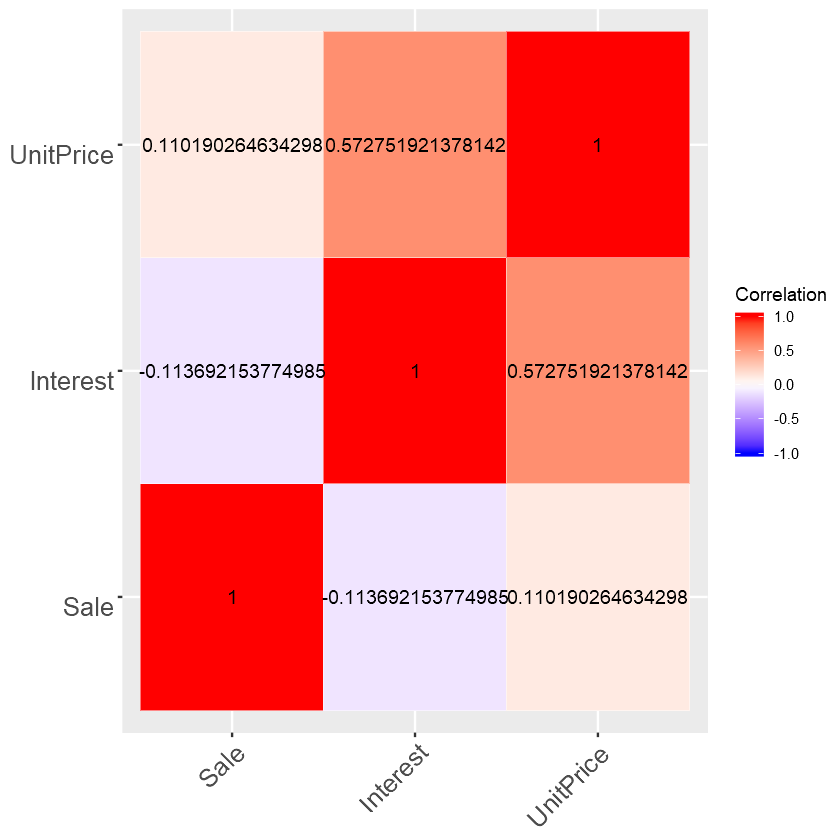

In [287]:
corre<-cor(xts1,use="pairwise.complete.obs")
melted_cormat <- melt(corre)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
geom_tile(color = "white")+ scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab",name="Correlation")+geom_text(aes(Var2, Var1, label = value), color = "black", size = 4)+theme(
  axis.title.x = element_blank(),
  axis.title.y = element_blank(),)+theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 15, hjust = 1),axis.text.y = element_text(angle =0, vjust = 1, 
    size = 15, hjust = 1))

Pairwise correlation is calculated in this cell. Results are shown in heatmap. There is negative correlation with sale and interest as expected. However it is not strong.

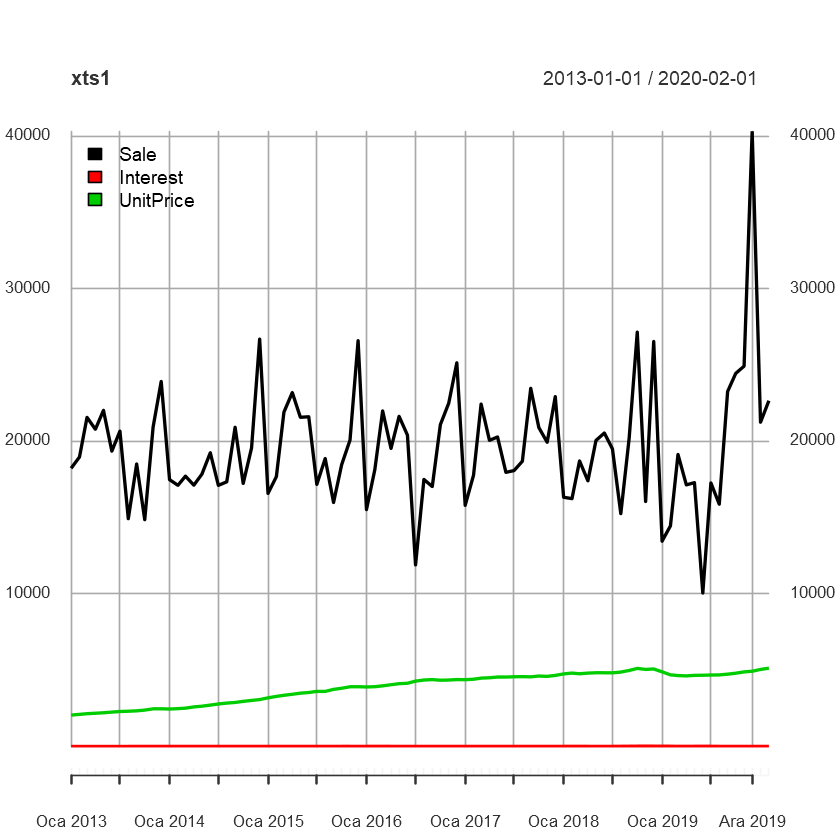

In [290]:
plot(xts1,legend.loc="topleft")

In this cell, values are plotted with respect to each other and dates. This plot does not show enough information since values are not scaled so we need another graph with scaled values

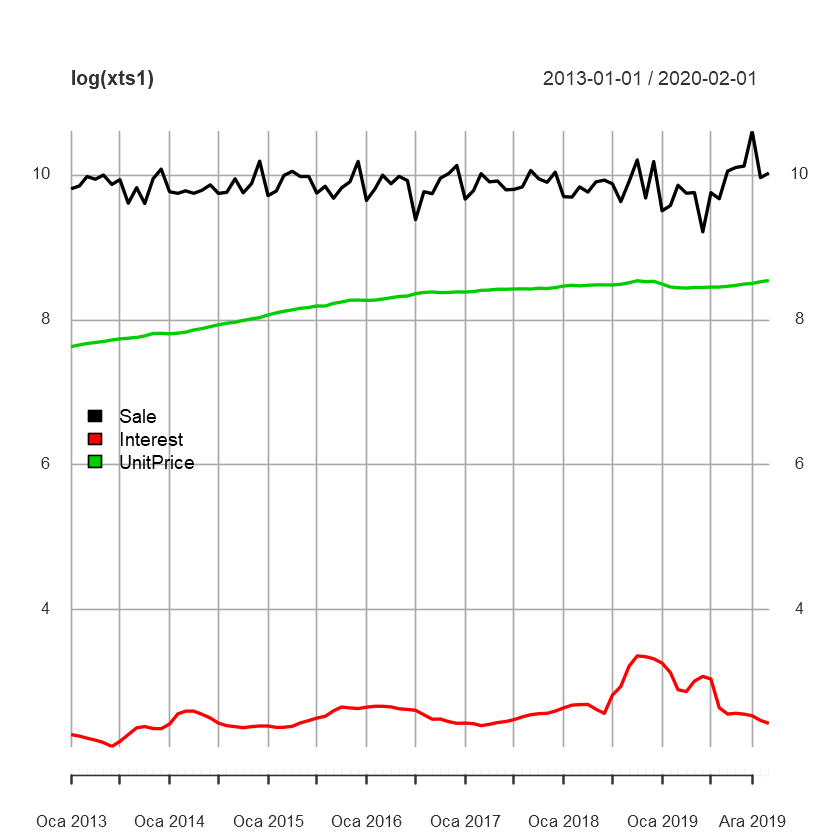

In [291]:
plot(log(xts1),legend.loc="left")

Plot xts has no built in log scale plotting attribute. Therefore, natural log of values are used in the plot directly. 

## Conclusion
 This homework aimed to find how Housing Loan Interest rate, Housing unit price in Istanbul and House Sales Statistics are related. High negative correlation between interest rate and housing sales is not observed as expected. This results can be reasoned by most people are renting their house in Istanbul rather than buying it. In addition to that people who buy house in Istanbul are not using loans. These are only hypothesis and further investigation is needed in order to prove them. Another observation that is interesting is positive moderate correlation between unit price and interest rate. It can be reasoned by economic situation of Turkey(high inflation) and highly inflated prices in real estate industry in last years .